# **CAPSTONE 2**

| Nama | Ulfatul Aini |
|------|---------------|
| Kelas | JCDS2304-015 |
| Lecture | Andy Hermawan |

## **Latar Belakang**

Perusahaan AWS (Amazon Web Services) adalah layanan berbasis cloud yang di sediakan oleh amazon sejak tahun 2020 hingga 2023. Amazon yang di kenal perusahaan yang besar untuk membeli buku dan lagu , tetapi sekarang amazon telah menambah layanan dalah hal infrastruktur *Cloud Computing*. 

Salah satu produk milik AWS adalah SaaS (Software as a Service) adalah model perangkat lunak yang berbasis cloud yang mengirimkan aplikasi ke pengguna melalui internet. Dengan Saas tidak perlu lagi memikirkan cara memelihara layanan atau cara mengelola infrastruktur. Pengguna hanya perlu memikirkan cara menggunakan perangkat lunak tersebut. Harga yang diberikan menyesuaikan dengan layanan yang di gunakan.

## **Data Understanding**

Dataset ini berisi data transaksi dari perusahaan SaaS fiktif yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B). Dalam dataset ini, setiap baris mewakili satu produk dalam suatu transaksi, dan kolom-kolom mencakup:

| No. | Column Name    | Description                                                |
|----|----------------|------------------------------------------------------------|
| 1  | Row ID         | Identifikasi unik untuk setiap transaksi.                  |
| 2  | Order ID       | Identifikasi unik untuk setiap pesanan.                    |
| 3  | Order Date     | Tanggal ketika pesanan ditempatkan.                         |
| 4  | Date Key       | Representasi numerik dari tanggal pesanan (YYYYMMDD).       |
| 5  | Contact Name   | Nama orang yang menempatkan pesanan.                       |
| 6  | Country        | Negara tempat pesanan ditempatkan.                         |
| 7  | City           | Kota tempat pesanan ditempatkan.                            |
| 8  | Region         | Wilayah tempat pesanan ditempatkan.                         |
| 9  | Subregion      | Subwilayah tempat pesanan ditempatkan.                      |
| 10 | Customer       | Nama perusahaan yang menempatkan pesanan.                  |
| 11 | Customer ID    | Identifikasi unik untuk setiap pelanggan.                   |
| 12 | Industry       | Industri yang dimiliki oleh pelanggan.                      |
| 13 | Segment        | Segmen pelanggan (SMB, Strategis, Enterprise, dll.).       |
| 14 | Product        | Produk yang dipesan.                                       |
| 15 | License        | Kunci lisensi untuk produk.                                |
| 16 | Sales          | Jumlah penjualan total untuk transaksi.                    |
| 17 | Quantity       | Jumlah total barang dalam transaksi.                       |
| 18 | Discount       | Diskon yang diterapkan pada transaksi.                     |
| 19 | Profit         | Keuntungan dari transaksi.                                  |

Berikut adalah dataset Asli: [Sumber](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales)


### Mengimpor Library yang diperlukan

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import folium
from folium.features import Choropleth
import geopandas as gpd

from operator import attrgetter
from datetime import datetime 

from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [87]:
data=pd.read_csv("SaaS-Sales.csv")
data.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## **Data Cleaning**

### Memeriksa apakah terdapat *Missing Value* pada Dataset

In [88]:
print("Number of missing values in each column:")
data.isnull().sum()


Number of missing values in each column:


Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Data SaaS sales tidak ada NaN atau setiap data memiliki value

## **Data Consistency**

### Memeriksa apakah terdapat data yang *Duplicate* pada Dataset

In [89]:
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


### Melihat tipe dari setiap data pada kolom yang ada di Dataset

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### Memeriksa Distribusi Data

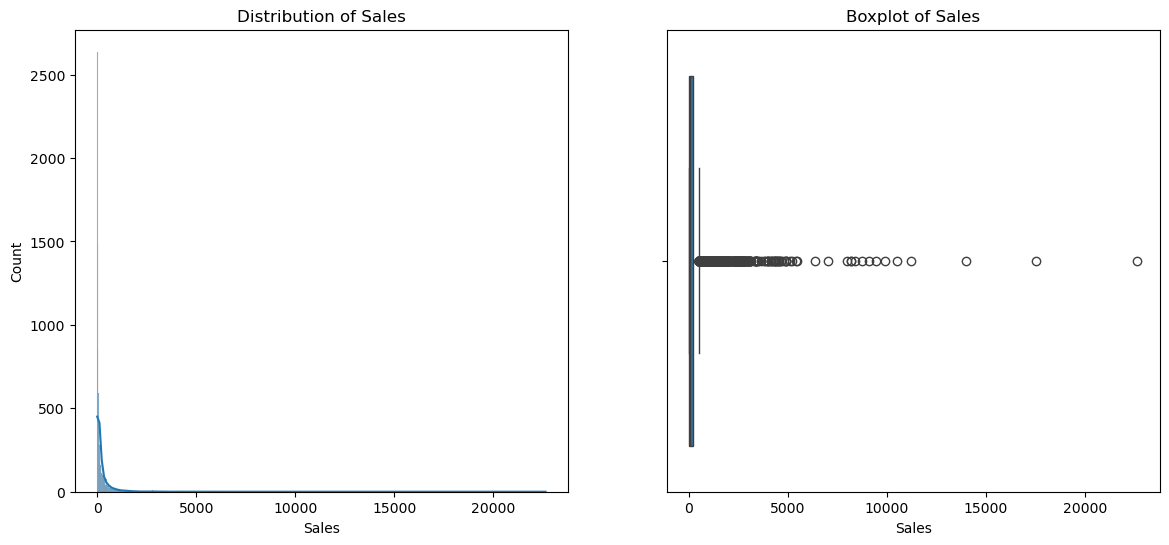

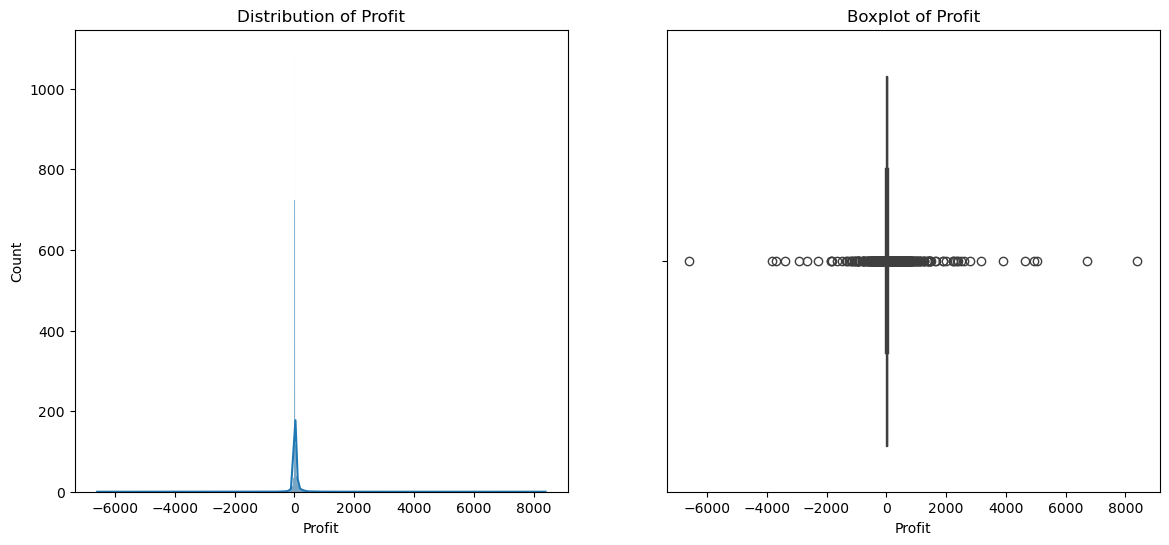

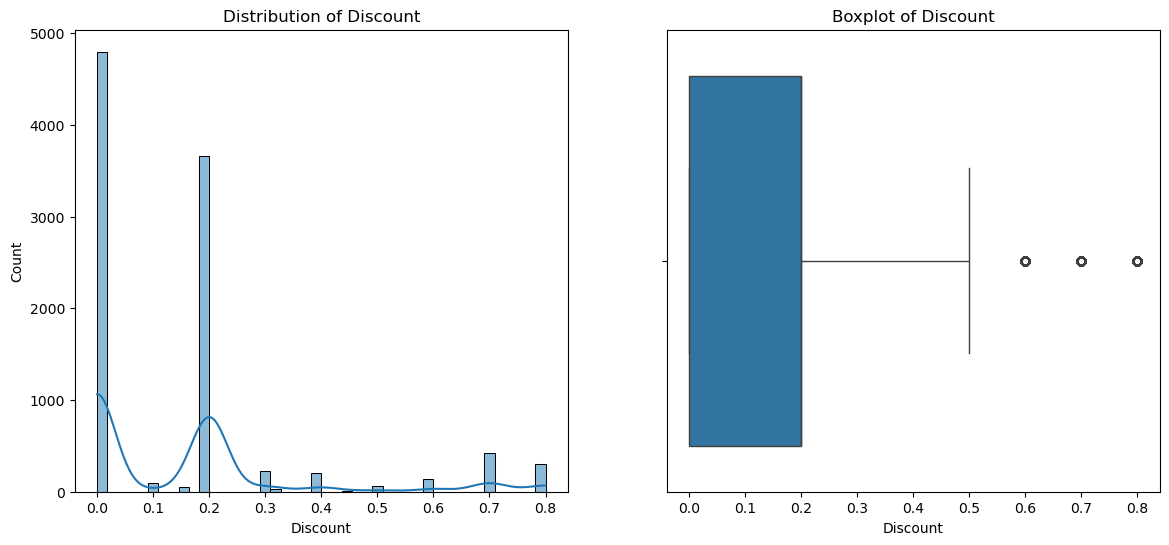

In [91]:
columns_to_check = ['Sales', 'Profit', 'Discount']

for column in columns_to_check:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    
    plt.show()


### Uji Normalitas

In [92]:
for column in columns_to_check:
    stat, p = shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)\n')
    else:
        print(f'{column} does not look Gaussian (reject H0)\n')


Shapiro-Wilk Test for Sales: Statistics=0.32332730293273926, p-value=0.0
Sales does not look Gaussian (reject H0)

Shapiro-Wilk Test for Profit: Statistics=0.25709807872772217, p-value=0.0
Profit does not look Gaussian (reject H0)

Shapiro-Wilk Test for Discount: Statistics=0.7107365727424622, p-value=0.0
Discount does not look Gaussian (reject H0)



### Memeriksa Outliers

In [93]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for column in columns_to_check:
    outliers = detect_outliers_iqr(data, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in Sales: 1167
Number of outliers in Profit: 1881
Number of outliers in Discount: 856


### Menangani Outliers

In [94]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for column in columns_to_check:
    data = handle_outliers_iqr(data, column)
    print(f'Number of outliers in {column} after handling: {len(detect_outliers_iqr(data, column))}')

Number of outliers in Sales after handling: 786
Number of outliers in Profit after handling: 559
Number of outliers in Discount after handling: 0


### Memeriksa Distribusi Data setelah Menangani Outliers

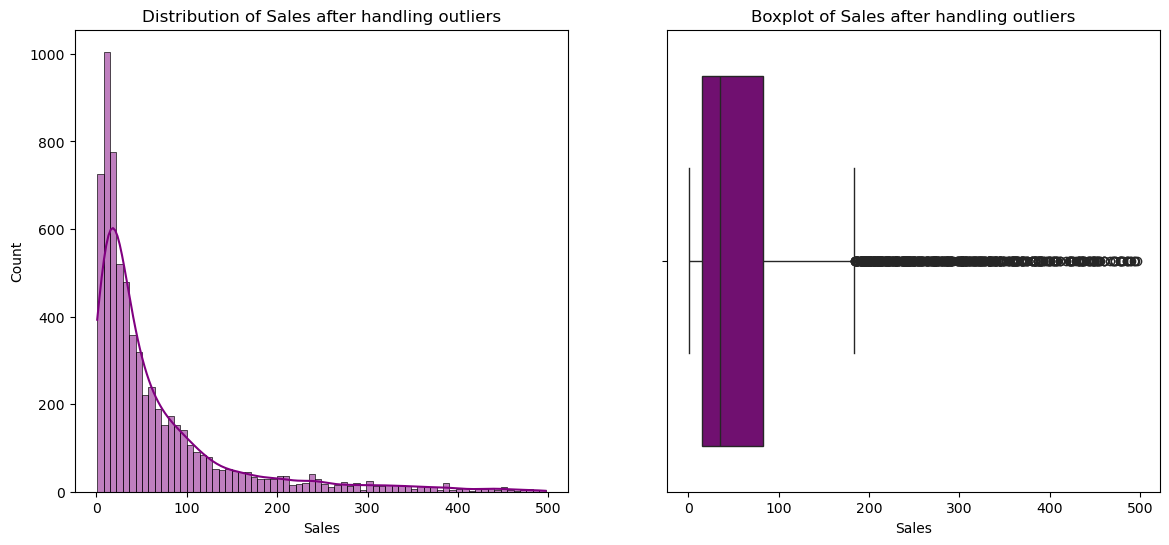

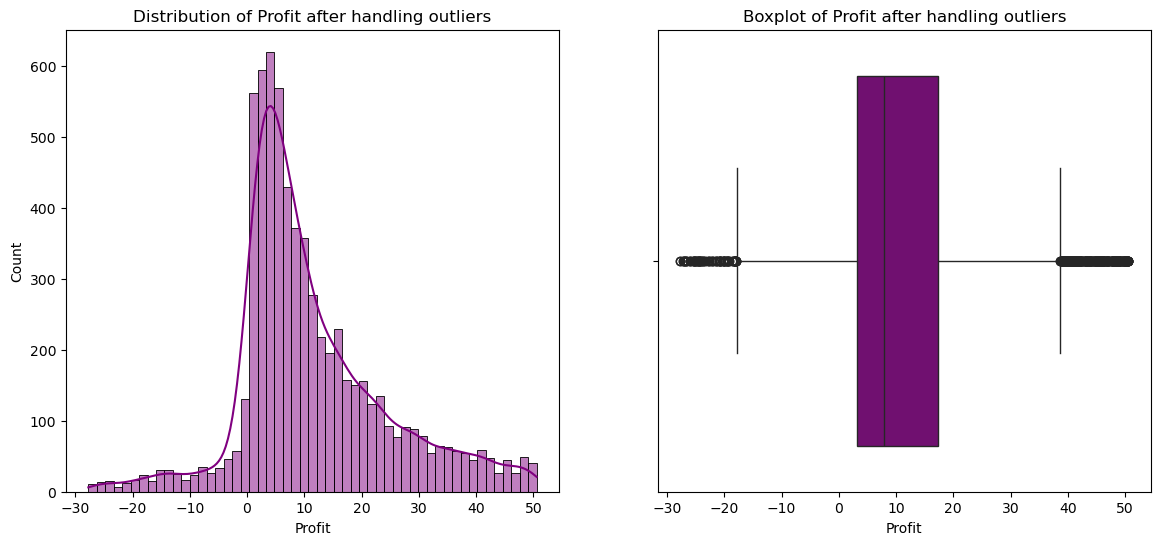

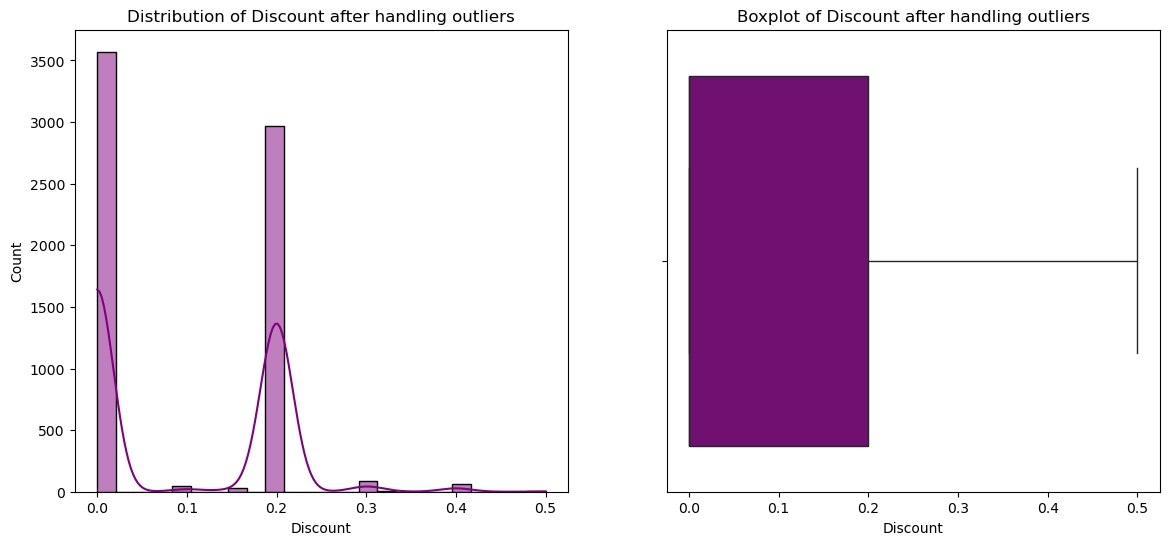

In [102]:
for column in columns_to_check:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, color='purple')
    plt.title(f'Distribution of {column} after handling outliers')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column], color='purple')
    plt.title(f'Boxplot of {column} after handling outliers')
    
    plt.show()

### Uji Normalitas setelah Menangani Outliers (Shapiro-Wilk Test)

In [96]:
for column in columns_to_check:
    stat, p = shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column} after handling outliers: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0) after handling outliers\n')
    else:
        print(f'{column} does not look Gaussian (reject H0) after handling outliers\n')

Shapiro-Wilk Test for Sales after handling outliers: Statistics=0.7019522786140442, p-value=0.0
Sales does not look Gaussian (reject H0) after handling outliers

Shapiro-Wilk Test for Profit after handling outliers: Statistics=0.9276896119117737, p-value=0.0
Profit does not look Gaussian (reject H0) after handling outliers

Shapiro-Wilk Test for Discount after handling outliers: Statistics=0.6950161457061768, p-value=0.0
Discount does not look Gaussian (reject H0) after handling outliers



## **ANALISA - 1**

| LATAR BELAKANG             |
|------------------------------|
|Dalam dunia bisnis yang dinamis, pemahaman mendalam tentang pelanggan menjadi aset berharga. Analisis data pelanggan yang komprehensif membuka peluang untuk memetakan preferensi dan perilaku mereka secara akurat. Dengan menggali informasi dari data pembelian, interaksi, dan demografi, perusahaan dapat mengidentifikasi segmen-segmen pelanggan yang berbeda.
|Segmentasi pelanggan yang efektif memungkinkan strategi pemasaran dan layanan yang disesuaikan, meningkatkan loyalitas dan pendapatan. Namun, mengidentifikasi segmen yang tepat membutuhkan pendekatan analitis yang kuat dan teknik yang tepat. Inilah tantangan utama yang harus dihadapi perusahaan saat ini.|



| Permasalahan         | Bagaimana kita dapat mengidentifikasi segmen pelanggan berdasarkan perilaku pembelian mereka untuk menyesuaikan strategi pemasaran yang lebih efektif?   |
|--------------|----------------|
| Tujuan Analisa        | Mengidentifikasi segmen pelanggan berdasarkan perilaku pembelian mereka untuk menyesuaikan upaya pemasaran.   |
||Memahami distribusi dan perilaku pelanggan berdasarkan analisis RFM.|
||Mengidentifikasi segmen pelanggan yang membutuhkan perhatian dan strategi khusus.|
| Stakeholder      | **Tim CRM (Customer Relationship Management)** : Mereka dapat menggunakan data untuk meningkatkan keterlibatan dan loyalitas pelanggan.|


### Visualisasi - RFM Analysis

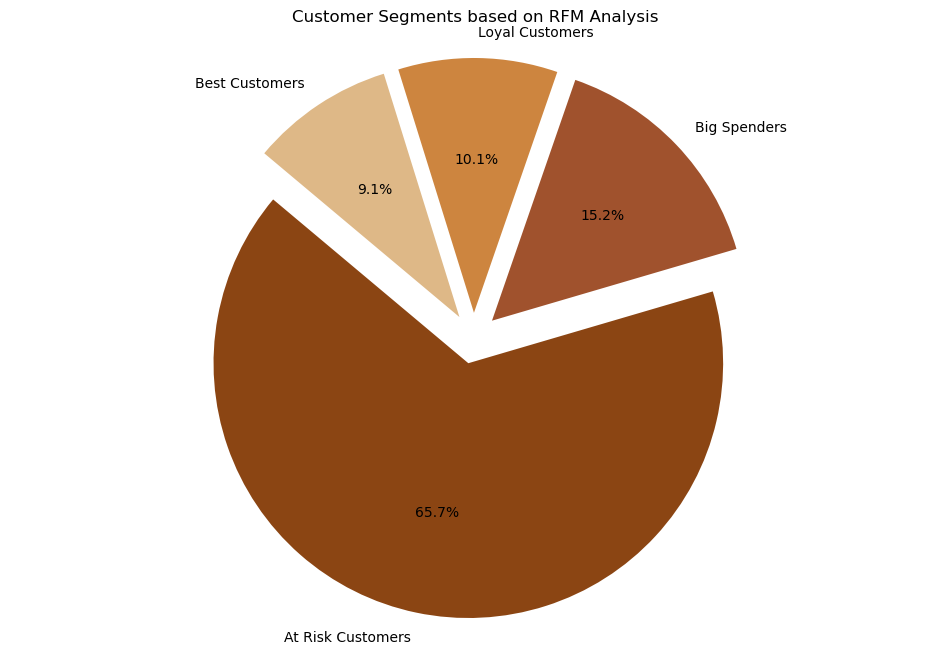

In [97]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

def rfm_analysis(data):
    current_date = data['Order Date'].max() + pd.DateOffset(1)
    rfm = data.groupby('Customer ID').agg({
        'Order Date': lambda x: (current_date - x.max()).days,
        'Order ID': 'nunique',
        'Sales': 'sum'
    })
    rfm.columns = ['Recency', 'Frequency', 'Monetary']
    
    rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=range(4, 0, -1))
    rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=range(1, 5))
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=range(1, 5))
    rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
    
    return rfm

rfm = rfm_analysis(data)

def categorize_rfm(score):
    if score in ['444']:
        return 'Best Customers'
    elif score in ['344', '433', '443', '434', '343']:
        return 'Loyal Customers'
    elif score in ['244', '233', '243', '234', '224', '223', '234']:
        return 'Big Spenders'
    else:
        return 'At Risk Customers'

rfm['Category'] = rfm['RFM_Score'].apply(categorize_rfm)
category_counts = rfm['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

explode = [0.1 if category == 'Best Customers' else 0.1 for category in category_counts['Category']]
brown_palette = ['#8B4513', '#A0522D', '#CD853F', '#DEB887']

plt.figure(figsize=(12, 8))
plt.pie(category_counts['Count'], labels=category_counts['Category'], autopct='%1.1f%%', startangle=140, explode=explode, colors=brown_palette)
plt.title('Customer Segments based on RFM Analysis')
plt.axis('equal')
plt.show()

|ANALISIS DARI VISUALISASI||
|---|--|
|Best Customers (9.1%)| Pelanggan yang sangat setia dan sering bertransaksi dengan nilai transaksi yang tinggi.|
|Loyal Customers (10.1%)| Pelanggan yang sering bertransaksi dan menunjukkan loyalitas tinggi tetapi mungkin dengan nilai transaksi yang sedikit lebih rendah dibanding Best Customers.|
|Big Spenders (15.2%)| Pelanggan yang melakukan transaksi dengan nilai besar namun frekuensi atau recency-nya mungkin lebih rendah.|
|At Risk Customers (65.7%)| Pelanggan yang sudah lama tidak melakukan transaksi atau frekuensinya sangat rendah.|

|INSIGHT||
|---|--|
|Konsentrasi Pelanggan yang Berisiko (At Risk Customers)| Mayoritas pelanggan masuk dalam kategori At Risk Customers, yang berarti banyak pelanggan yang mungkin berhenti bertransaksi atau sudah tidak aktif.|
|Peluang untuk Mempertahankan Pelanggan Setia (Best Customers dan Loyal Customers)| Sekitar 19.2% pelanggan berada di segmen yang sangat berharga (Best Customers dan Loyal Customers), yang merupakan aset penting bagi bisnis.|
|Peluang Meningkatkan Pengeluaran dari Pelanggan (Big Spenders)| Pelanggan yang masuk dalam kategori Big Spenders perlu didorong untuk meningkatkan frekuensi transaksi mereka.|

|Segments|How|Action Recommendations|
|--|---|---|
|Pelanggan Berisiko (At Risk Customers)|Strategi Retensi| Buat kampanye pemasaran yang menarik untuk mengembalikan minat pelanggan ini. Berikan penawaran khusus atau diskon untuk menarik mereka kembali.|
||Personalized Communication| Hubungi mereka secara pribadi untuk memahami alasan ketidakaktifan mereka dan tawarkan solusi yang relevan.|
|Pelanggan Setia (Loyal Customers dan Best Customers)|Program Loyalitas| Tingkatkan program loyalitas yang memberikan insentif tambahan untuk transaksi berulang. Berikan penghargaan eksklusif untuk Best Customers.|
||Feedback Loop| Libatkan pelanggan setia dalam feedback loop untuk mendapatkan masukan yang dapat meningkatkan produk atau layanan.|
|Pelanggan dengan Pengeluaran Besar (Big Spenders)|Upselling dan Cross-selling| Tawarkan produk atau layanan tambahan yang mungkin menarik bagi mereka. Strategi upselling dan cross-selling dapat meningkatkan nilai transaksi mereka.|
||Eksklusivitas| Berikan akses eksklusif ke produk atau layanan baru untuk mendorong loyalitas dan meningkatkan frekuensi transaksi.|


|KESIMPULAN|
|--|
|Visualisasi analisis RFM menunjukkan bahwa sebagian besar pelanggan AWS SaaS berada dalam kategori At Risk Customers, yang memerlukan strategi khusus untuk mengembalikan minat mereka dan meningkatkan retensi. Pelanggan setia dan pelanggan dengan pengeluaran besar menawarkan peluang besar untuk meningkatkan pendapatan melalui program loyalitas dan strategi pemasaran yang ditargetkan. Dengan tindakan yang tepat berdasarkan analisis ini, perusahaan dapat meningkatkan retensi pelanggan, meningkatkan pendapatan, dan memastikan kepuasan pelanggan yang lebih tinggi.|

## **ANALISA - 2**

| LATAR BELAKANG             |
|------------------------------|
| Dalam industri penjualan perangkat lunak SaaS, memahami performa penjualan dan profitabilitas setiap produk sangat penting untuk mengoptimalkan strategi pemasaran dan keputusan strategis. Mengevaluasi penjualan dan profit dari setiap produk yang ditawarkan perusahaan, sehingga kita dapat menganalisis kontribusi dan potensi masing-masing produk.   |

| Permasalahan         | Mengapa beberapa produk memiliki penjualan tinggi tetapi profit rendah, dan bagaimana kita bisa meningkatkan profitabilitas produk tersebut?  |
|--------------|----------------|
| Tujuan Analisa        | meningkatkan profitabilitas dan efisiensi pemasaran produk SaaS melalui pemahaman yang lebih baik tentang kinerja penjualan dan profit masing-masing produk.   |
| Stakeholder      | Sales Team. |

### Visualisasi - Grafik *Sales* dan *Profit* berdasarkan *Product*

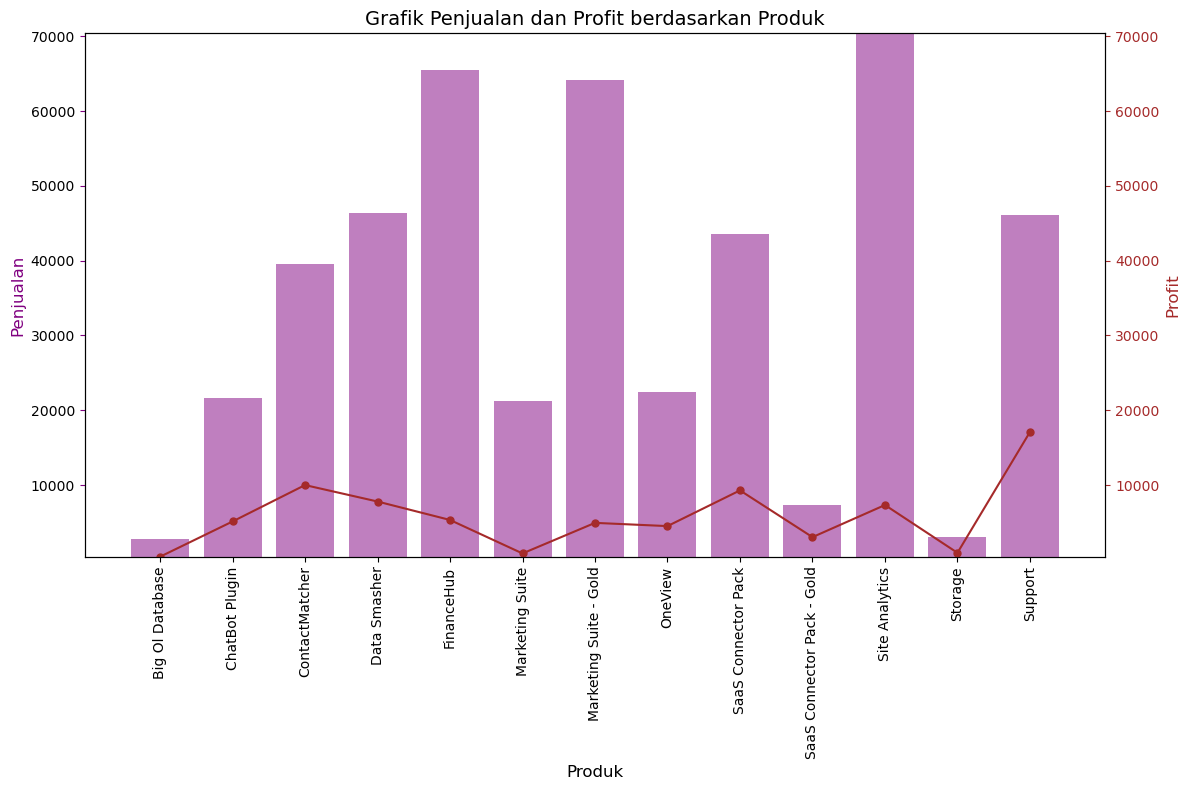

In [98]:
product_sales = data.groupby('Product')['Sales'].sum().reset_index()
product_profit = data.groupby('Product')['Profit'].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(product_sales['Product'], product_sales['Sales'], color='purple', alpha=0.5)
ax1.set_xlabel('Produk', fontsize=12)
ax1.set_ylabel('Penjualan', color='purple', fontsize=12)
ax1.tick_params('y', color='purple')
ax1.set_xticklabels(product_sales['Product'], rotation=90)

ax2 = ax1.twinx()
ax2.plot(product_profit['Product'], product_profit['Profit'], color='brown', marker='o', markersize=5)
ax2.set_ylabel('Profit', color='brown', fontsize=12)
ax2.tick_params('y', colors='brown')

y_min = min(product_sales['Sales'].min(), product_profit['Profit'].min())
y_max = max(product_sales['Sales'].max(), product_profit['Profit'].max())
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

plt.title('Grafik Penjualan dan Profit berdasarkan Produk', fontsize=14)
fig.tight_layout()
plt.show()

|ANALISA DARI VISUALISASI|Produk dengan Penjualan Tinggi dan Profit Rendah|Produk dengan Penjualan dan Profit Rendah|Produk dengan Penjualan dan Profit Tinggi|
|--|--|--|--|
||Data Smasher|Big Ol Database|Storage|
||FinanceHub|ChatBot Plugin|Support|
||Marketing Suite - Gold|OneView||
||Saas Connector Pack|||

|INSIGHT||
|--|--|
|Produk dengan Penjualan Tinggi dan Profit Rendah|Produk-produk ini memiliki pangsa pasar yang besar tetapi profitabilitasnya tidak sebanding dengan volume penjualannya.|
|Produk dengan Penjualan dan Profit Rendah| Produk-produk ini tidak memiliki daya tarik pasar yang signifikan dan profitabilitasnya juga rendah.|
|Produk dengan Penjualan dan Profit Tinggi|Produk-produk ini menunjukkan performa yang baik dalam hal penjualan dan profitabilitas, menunjukkan bahwa mereka memiliki proposisi nilai yang kuat dan disukai oleh pasar.|

|Segments| Programm         | Action Recommendation  |
|--|------------|----------------|
|Produk dengan Penjualan Tinggi dan Profit Rendah|Review Pricing Strategy| Evaluasi harga produk dan pertimbangkan peningkatan harga untuk meningkatkan margin profit.|
||Cost Optimization| Analisis biaya produksi dan operasional untuk menemukan cara mengurangi biaya tanpa mengorbankan kualitas produk.|
||Value Proposition Enhancement| Tingkatkan nilai tambah produk melalui fitur tambahan atau layanan premium yang dapat dijual dengan harga lebih tinggi.|
|Produk dengan Penjualan dan Profit Rendah|Market Research| Lakukan riset pasar untuk memahami mengapa produk ini kurang diminati. Identifikasi kebutuhan dan preferensi pelanggan yang mungkin tidak terpenuhi.|
||Product Improvement| Tingkatkan fitur atau kinerja produk berdasarkan feedback pelanggan dan hasil riset pasar.|
||Targeted Marketing Campaigns| Luncurkan kampanye pemasaran yang lebih terarah untuk meningkatkan kesadaran dan minat terhadap produk-produk ini.|
|Produk dengan Penjualan dan Profit Tinggi|Scale Marketing Efforts| Perluas upaya pemasaran untuk menjangkau lebih banyak pelanggan potensial dan memperluas pangsa pasar.|
||Invest in Customer Support| Tingkatkan dukungan pelanggan untuk memastikan tingkat kepuasan tinggi dan loyalitas pelanggan.|
||R&D Investment| Investasikan dalam penelitian dan pengembangan untuk terus memperbarui dan meningkatkan produk sesuai dengan kebutuhan pasar yang berubah.|

|KESIMPULAN|
|----------|
|Analisis ini menunjukkan bahwa ada variasi signifikan dalam performa penjualan dan profitabilitas produk SaaS perusahaan. Produk dengan penjualan tinggi tetapi profit rendah memerlukan peninjauan strategi harga dan pengurangan biaya. Produk dengan penjualan dan profit rendah memerlukan peningkatan fitur dan strategi pemasaran yang lebih baik. Produk dengan performa tinggi perlu didukung dan diperluas lebih lanjut untuk mempertahankan dan meningkatkan pangsa pasar serta profitabilitas. Dengan demikian, perusahaan dapat mengoptimalkan portofolio produknya dan meningkatkan profitabilitas keseluruhan.|

## **ANALISA - 3**


|LATAR BELAKANG|
|----------|
|Diskon adalah strategi umum untuk meningkatkan penjualan, namun penting untuk memahami dampaknya terhadap profitabilitas.|

| Permasalahan         | Bagaimana pengaruh diskon terhadap volume penjualan dan profitabilitas?   |
|--------------|----------------|
|Tujuan Analisa|Memahami hubungan antara diskon, penjualan, dan profit untuk mengoptimalkan strategi bisnis.|
||Menyusun strategi diskon yang lebih efektif yang dapat meningkatkan penjualan tanpa mengorbankan profit.|
||Mengidentifikasi langkah-langkah untuk meningkatkan profitabilitas melalui penjualan dan manajemen diskon.|
| Stakeholder      | Management Team|

### Visualisasi - Korelasi dari *Discount*, *Sales* dan *Profit*

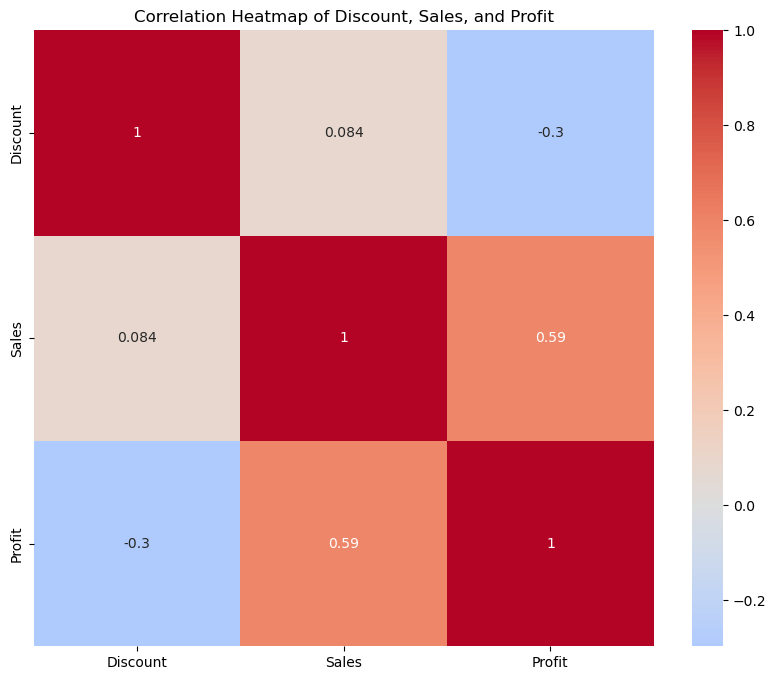

In [99]:
data_heatmap = data[['Discount', 'Sales', 'Profit']]

correlation_matrix = data_heatmap.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Discount, Sales, and Profit')
plt.show()


|ANALISIS DARI VISUALISASI||
|--|--|
|Korelasi Discount dan Profit (-0.3)|Korelasi negatif moderat antara Discount dan Profit.|
||Peningkatan diskon cenderung berhubungan dengan penurunan profit.|
|Korelasi Discount dan Sales (0.084)|Korelasi positif rendah antara Discount dan Sales.|
||Peningkatan diskon sedikit berhubungan dengan peningkatan penjualan, tetapi tidak signifikan.|
|Korelasi Sales dan Profit (0.59)|Korelasi positif moderat antara Sales dan Profit.|
||Peningkatan penjualan cenderung berhubungan dengan peningkatan profit.|


|INSIGHT||
|--|--|
|Diskon berpengaruh negatif pada profit| Meskipun diskon dapat meningkatkan penjualan sedikit, efeknya pada profit adalah negatif. Hal ini menunjukkan bahwa memberikan diskon mungkin tidak selalu menjadi strategi yang menguntungkan.|
|Penjualan berpengaruh positif pada profit| Meningkatkan penjualan dapat berdampak positif pada profit, yang merupakan hubungan logis dan diharapkan.|

|Action Recommendations||
|--|--|
|Optimasi Diskon|Evaluasi kembali strategi diskon untuk memastikan bahwa diskon yang diberikan tidak terlalu tinggi sehingga mengurangi profit secara signifikan.|
||Pertimbangkan untuk memberikan diskon pada produk dengan margin tinggi untuk meminimalkan dampak negatif pada profit.|
|Fokus pada Peningkatan Penjualan|Tingkatkan upaya pemasaran dan penjualan untuk meningkatkan volume penjualan yang secara langsung dapat meningkatkan profit.|
||Analisis lebih lanjut tentang produk atau segmen pelanggan yang paling menguntungkan untuk mengarahkan upaya penjualan.|
|Evaluasi Produk dan Harga|Lakukan analisis lebih mendalam untuk memahami produk mana yang paling dipengaruhi oleh diskon dan sesuaikan harga dan strategi promosi secara tepat.|



|KESIMPULAN|
|--|
|Heatmap korelasi menunjukkan bahwa diskon memiliki dampak negatif pada profit, meskipun sedikit meningkatkan penjualan. Fokus pada peningkatan penjualan secara keseluruhan dapat membantu meningkatkan profit lebih efektif dibandingkan dengan memberikan diskon besar-besaran. Strategi diskon harus dioptimalkan untuk menjaga profitabilitas, sementara upaya pemasaran harus ditingkatkan untuk mendorong penjualan.|


In [103]:
data.to_csv('Analisa_saas_sales.csv')
rfm.to_csv('Analisa_RFM.csv')